# Bank Term Deposit Prediction

This project contains details of a direct marketing campaign of a portuguese bank. The marketing campaign was used market term deposit to the clients.
It contains information bank client data such as client Age , Job , personal loans status , details of previous marketing campaigns etc

The goal of the project is to predict which clients will subscribe for a Term Deposit and which features are most important in the prediction process.

Here we have the feature descriptions of our dataset

Attribute Information:

Input variables:
bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
#Import the pandas library for data manipulation
import pandas as pd
#Import numpy library for algebraic operations
import numpy as np

#Import seaborn for data visualization
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the data
df = pd.read_csv("bank-additional-full.csv" , sep= ";")

In [3]:
#Use the info function to find out more regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

The dataset consists of 20 independent variables regarding the client and one dependent variable signifying if client subscribed to a term deposit or not. Also the dataset consists of a mix of continous and categorical variables.

Now lets do a feature analysis of the independent features

We can not plot a correlation matrix here as the dependent variable is a categorical variable

# Data Exploration

In [4]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

We see here that majority of the clients did not subscribe to a term deposit.

## Bivariate analysis with target variable

### Age vs Term Deposit

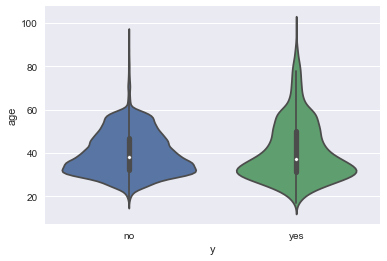

In [5]:
sns.violinplot( x="y",y="age", data=df);

The above chart shows age distribution of the clients who did and did not subscribe to a term deposit

Most clients close to the Age 35 subscribe to a term deposit.

Actionable insight - clients above the age 60 had more chances of getting a term deposit, so they can be the ones who can be targetted.

### Marital status vs Term Deposit

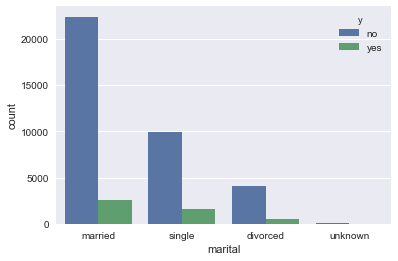

In [6]:
sns.countplot(x = "marital" ,hue='y' ,  data = df)

We see from the above plot majority of the clients are married , and also maximum clients who subscribed to a term deposit are married.

Actionable Insight - Married clients have a higher chance of obtaining a term deposit so they can be targetted in the marketing campaigns

### Job type vs Term Deposit

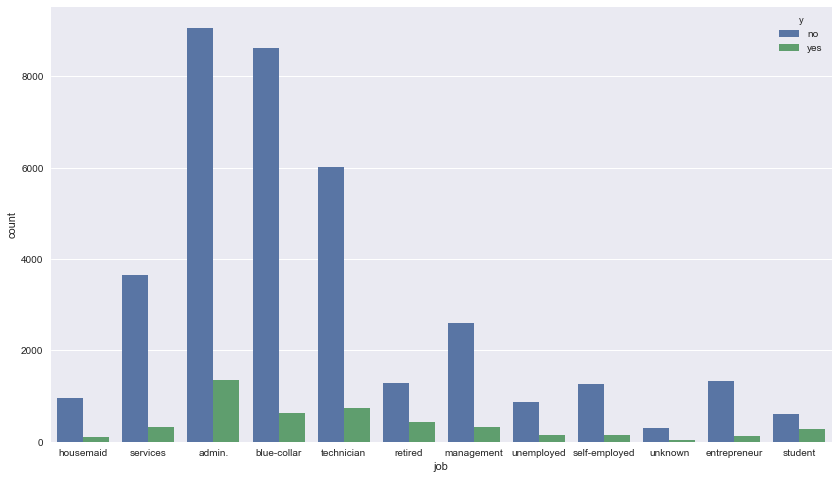

In [7]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'job' , hue = 'y' , data = df)

Now the above figure shows a very distinct picture.

Actionable insight - Majority of the clients of the bank have admin jobs , and those are the ones having the max number of term deposits followed by technicians. The Bank can target people with job titles related to Admin and Technician

### Education Type and Term Deposit

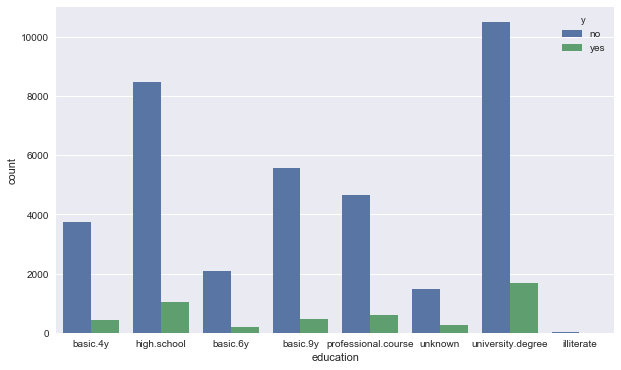

In [49]:
plt.figure(figsize=(10,6))
sns.countplot( x = 'education' , hue = 'y' , data = df )

We can see from the above plot most clients of the bank have either a university degree or a high school education.

The clients with university degree have the highest number of term deposits followed by clients with high school education.

Actionable Insight - The bank can target people who have a high school or a university degree.

### Credit Default and Term deposits

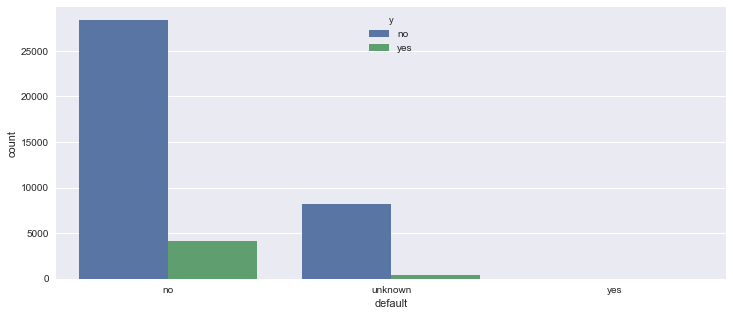

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x = 'default' , hue = "y"  , data = df)

The above plot shows most of the clients do not default on their credit ( which is expected) and close to 5000 of these clients subscribe to term deposits

Actionable Insight - Bank should not approach clients who have a Credit default for Term Deposits

### Housing Loan vs Term Deposit

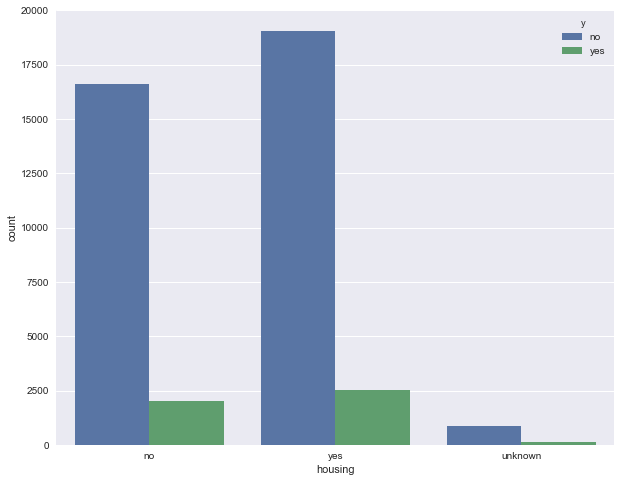

In [10]:
plt.figure(figsize=(10,8))
sns.countplot( x = 'housing' , hue = "y"  ,data = df)

This plot shows that clients that had a housing loan tend to have more term deposits than those who dont have a term deposit.

Actionable insights - The Bank can target clients who have a housing Loan for term Deposits.

### Personal Loan vs Term Deposit

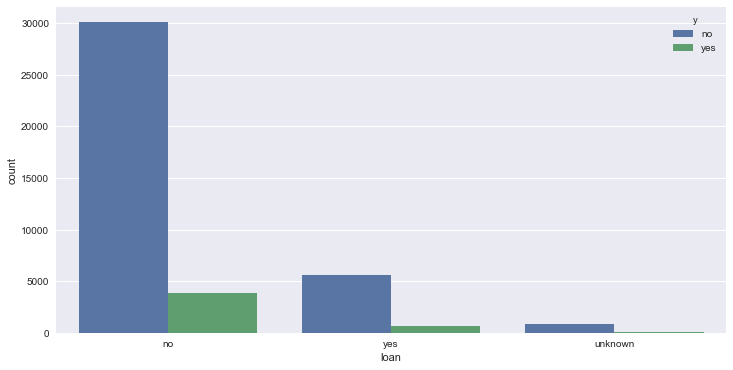

In [11]:
plt.figure(figsize=(12,6))
sns.countplot ( x = 'loan' , hue = "y" , data = df)

The above plot shows that most of the clients did not have a personal loan , and of those who dont approximately 4000 subscribed to a term deposit.

Actionable insight - The bank can target people who do not have a Term Deposit

## Current campaign features

Lets see how the current marketing campaign fared

### Marketing Communication

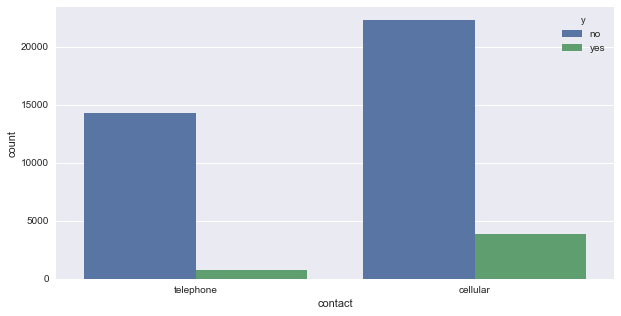

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'contact' , hue = "y" , data = df)

This  plot shows most people were contacted through a cellular contact number and also higher number of term deposits

Actionable Insight - The bank can prioritize Cellular marketing channel over other channels in the campaign

### Month of communication

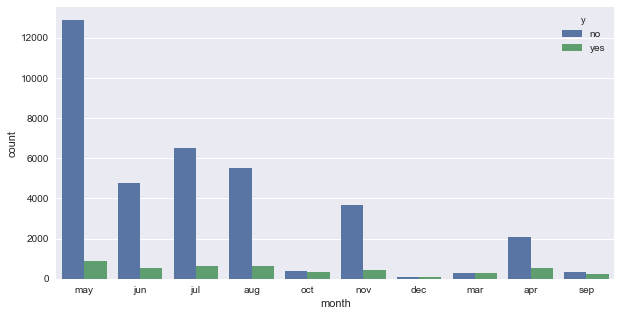

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'month' , hue = "y" , data = df)

### Number of contacts during campaign vs Term Deposits

The above plot shows there isnt a significant difference in the term deposit subscripctions based on which day of the week the client was contacted

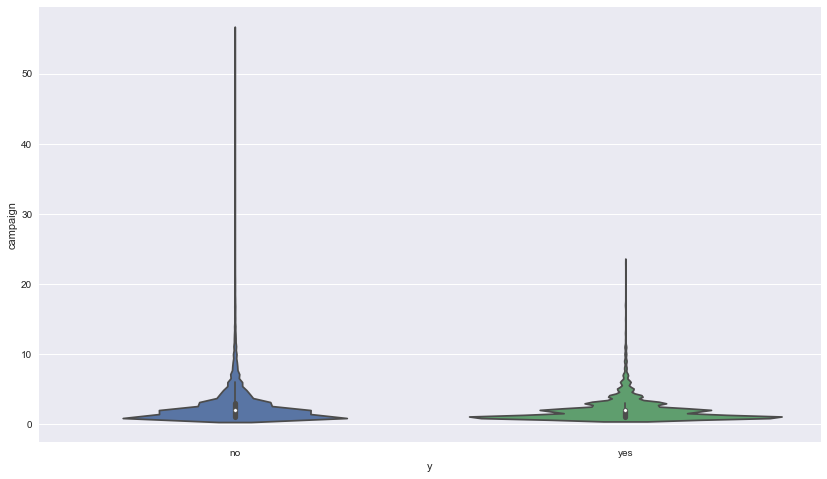

In [14]:
plt.figure(figsize=(14,8))
sns.violinplot(x="y", y="campaign", data = df)

The above plot shows that contacting the client more than 25 times in a campaign did not yield to a Term Deposit and most Term Deposits were bought when customer was contacted less than 7 times.

Actionable Insight - Approaching a client more than 7 times during a campaign would not yield a positive response from the client.

### Days Since last contact and Term Deposit

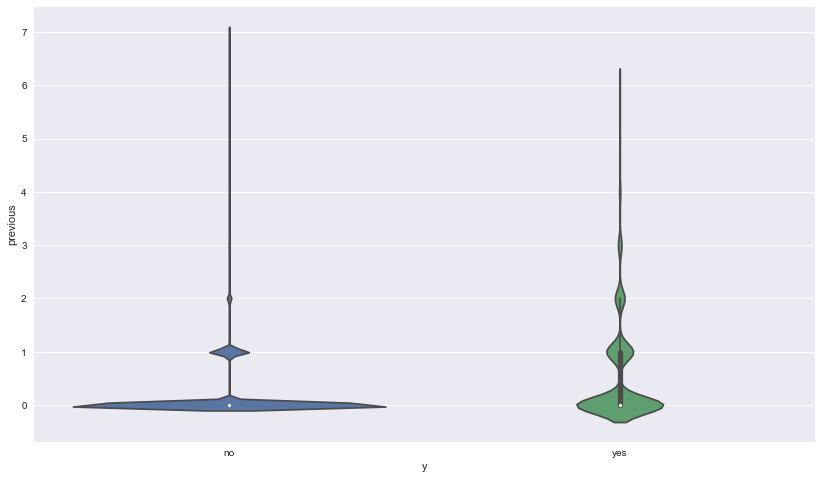

In [50]:
plt.figure(figsize=(14,8))
sns.violinplot(x= 'y',y='previous', data = df)

The above plot shows as days since last contact increase there is a lesser chance to get term deposit

Actionable Insight - As the gap between current and previous contact increases , highly likely client would not subscribe to a Term Deposit

### Missing values Detection

In [51]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


So we see that we dont have any missing values in our dataset

### Outlier Detection

Lets first create a function to select only the numeric features from the dataset

In [17]:
def only_numeric_data (data):
    data = data[data.select_dtypes(exclude=['object']).columns]
    return data

In [18]:
numeric_df = only_numeric_data(df)

Now lets create a function to find the outliers in each column based on Z-score and remove those rows

In [19]:
def remove_outliers(data):
    data = data[(np.abs(stats.zscore(numeric_df))< 3).all(axis=1)]
    return data

In [20]:
filter_df = remove_outliers(numeric_df)

In [21]:
index =filter_df.index.tolist()

In [22]:
df_new = df.iloc[index]

In [23]:
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Now we have removed the rows which had outliers( values more than 3 times the standard deviation)

### Convert categorical variables to dummy variables

Logistic regression can not use non numrical values in prediction , so we convert the categorical variables into dummy variables

In [24]:
from sklearn.preprocessing import LabelEncoder
labelEnc=LabelEncoder()

In [25]:
df_X = df_new.drop('y' , axis = 1)

In [26]:
df_X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [27]:
df_cat = pd.get_dummies(df_X,drop_first=True)

In [28]:
df_cat.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,1,0,0,0,1


In [29]:
df_new['outcome']=labelEnc.fit_transform(df_new['y'])

In [30]:
df_final = pd.concat([df_cat,df_new['outcome']],axis=1)

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37314 entries, 0 to 41186
Data columns (total 53 columns):
age                              37314 non-null int64
duration                         37314 non-null int64
campaign                         37314 non-null int64
pdays                            37314 non-null int64
previous                         37314 non-null int64
emp.var.rate                     37314 non-null float64
cons.price.idx                   37314 non-null float64
cons.conf.idx                    37314 non-null float64
euribor3m                        37314 non-null float64
nr.employed                      37314 non-null float64
job_blue-collar                  37314 non-null uint8
job_entrepreneur                 37314 non-null uint8
job_housemaid                    37314 non-null uint8
job_management                   37314 non-null uint8
job_retired                      37314 non-null uint8
job_self-employed                37314 non-null uint8
job_services     

### Recursive Feature Selection

This process applies the selected recursively to select the most useful features from the dataset

In [32]:
X = df_final.drop('outcome',axis=1)
y = df_final['outcome']

In [33]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False False False  True False
 False False  True False  True  True False False False False  True False
 False False False False False  True False  True False False False False
 False  True False False  True  True  True  True False  True False  True
 False False  True  True]
[30 23  4  5  1  1 28 33 14  7  1 19 26 31  1 20  1  1 27 17 22  3  1 32  8
  2 29 21 16  1 18  1 35 24 34 25  9  1  6 11  1  1  1  1 15  1 12  1 10 13
  1  1]


In [34]:
df_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,outcome
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [35]:
X1 = df_final.loc[:, rfe.support_]
y1 = df_final['outcome']

### Predictive Modeling - Logistic Regression

In [36]:
#Dividing the dataset within train and test sets

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

### Fitting a Logit model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Summary of model

In [40]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.234013
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                27985
Model:                          Logit   Df Residuals:                    27967
Method:                           MLE   Df Model:                           17
Date:                Sat, 25 Aug 2018   Pseudo R-squ.:                  0.1590
Time:                        09:30:00   Log-Likelihood:                -6548.9
converged:                       True   LL-Null:                       -7787.2
                                        LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
previous                       -2.9245      0.086    -33.876      0.000   

From the above summary we see that below features have p-value less than 0.05

### Model Interpretation

Lets interpret the model coefficients from the Logistic Regression summary

Observing feature 'previous' with coefficient = -2.92



In [52]:
#taking the exponential and subtracting 1 as coefficients are the log odds.
np.exp(-2.92) - 1

-0.94606631269964403

We will see 94% decrease in the odds of getting a term deposit for every one time a customer was contacted after the previous contact , holding the other features fixed

Similarly we can interpret the other variables

### Model Prediction

In [42]:
y_pred = logreg.predict(X_test)

In [43]:
#Accuracy of the model
print(logreg.score(X_test, y_test))

0.918640797513


This shows that our model would be accurate approximately 92% 

### Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8530   64]
 [ 695   40]]


The result is telling us that we have 8530(TP)+40(TN) correct predictions and 695(FP)+64(FN) incorrect predictions.

### Classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.99      0.96      8594
          1       0.38      0.05      0.10       735

avg / total       0.88      0.92      0.89      9329



The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.It is ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.It is the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0

### ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)

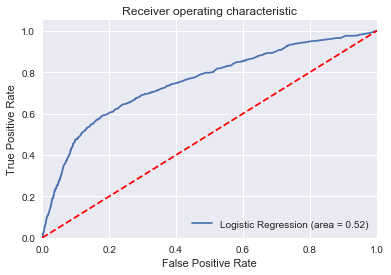

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The Area Under the Curve metric ( AUC) is equal to 0.52 and this shows our model is better than random guessing